# 二重矢板の予測

In [34]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import preprocessing

## 1.CSVファイルの読み込み

In [35]:
#データの読み込み
data_folder = input("データファイルのあるフォルダまでのパス")
data_folder = data_folder.rstrip()
data_folder = data_folder.replace("\\", "/") + "/"

file1 = data_folder + "train_data1.csv"
file2 = data_folder + "train_labels.csv"

df1 = pd.read_csv(file,encoding="cp932")
df2 = pd.read_csv(file,encoding="cp932")

df = pd.concat([df1,df2],axis = 1)
# df = df.drop(["","X","Y","KEY_CODE","最寄り駅","最寄り駅の緯度","最寄り駅の経度","評価_状態"],axis=1)

In [36]:
pd.set_option('display.max_columns',30)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,...,中詰め粘着力,矢板型,矢板材料,引張材直径,引張材材料番号,腹起し材質,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,...,190,3,390,35,1,1,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,...,192,4,390,67,0,1,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,...,9,5,390,28,1,0,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,...,69,3,295,90,1,1,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,...,70,3,390,40,1,1,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216


## ラベルエンコーディング

In [37]:
df['矢板型'] = df['矢板型'].apply(str)
df['矢板材料'] = df['矢板材料'].apply(str)

In [38]:
df = pd.get_dummies(df)
print(df.shape)

(8928, 35)


In [39]:
pd.set_option('display.max_columns',35)
df.head()

,堤体延長,堤体幅,左右壁体高さ,中詰土天端高さ,堤外区間地表面,堤内区間地表面,引張材間隔,在来地盤重量,在来地盤区分,在来地盤N値,在来地盤摩擦角,在来地盤粘着力,在来地盤変形係数,中詰め重量,中詰め区分,中詰めN値,中詰め摩擦角,中詰め粘着力,引張材直径,引張材材料番号,腹起し材質,堤外側水位_常時,堤内側水位_常時,せん断変形破壊,滑動、支持力,根入れ部の安定,遮水効果,矢板の耐力照査,タイロッドの耐力照査,腹起しの耐力照査,矢板型_3,矢板型_4,矢板型_5,矢板材料_295,矢板材料_390
0,20,5.7,4.0,3.9,0.0,0.0,1.6,12,1,7,24,165,179400,12,1,20,42,190,35,1,1,0.1,0.0,0.001200,0.016980,0.001000,0.030435,0.000000,0.000000,0.000000,1,0,0,0,1
1,29,8.2,6.8,6.7,3.1,0.0,1.6,20,0,28,7,242,59700,13,0,43,28,192,67,0,1,4.3,0.0,0.027998,0.074074,0.049689,0.693069,0.055319,0.023256,0.010811,0,1,0,0,1
2,23,13.3,9.7,9.6,0.0,0.8,1.6,18,1,27,7,136,139100,17,0,35,22,9,28,1,0,8.4,0.1,0.237154,0.195440,0.236220,1.250000,0.353191,1.818182,0.614286,0,0,1,0,1
3,13,10.6,8.5,8.4,0.0,1.0,1.6,12,0,11,21,272,118900,15,1,42,34,69,90,1,1,3.0,0.2,0.001200,0.030083,0.020192,0.360825,0.005556,0.000000,0.000000,1,0,0,1,0
4,17,11.8,5.9,5.8,0.0,0.9,0.8,16,0,21,35,10,59000,15,0,2,27,70,40,1,1,5.5,0.4,0.070217,0.268456,0.235756,0.498575,0.046809,0.078431,0.016216,1,0,0,0,1


## 相関を調べる

In [40]:
# 目的変数の設定
pur = "堤体延長"

In [41]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(200,200)})
sns.heatmap(df.corr(),square=True, vmax=1, vmin=-1, center=0,cmap='coolwarm')

<AxesSubplot:>

<AxesSubplot:>

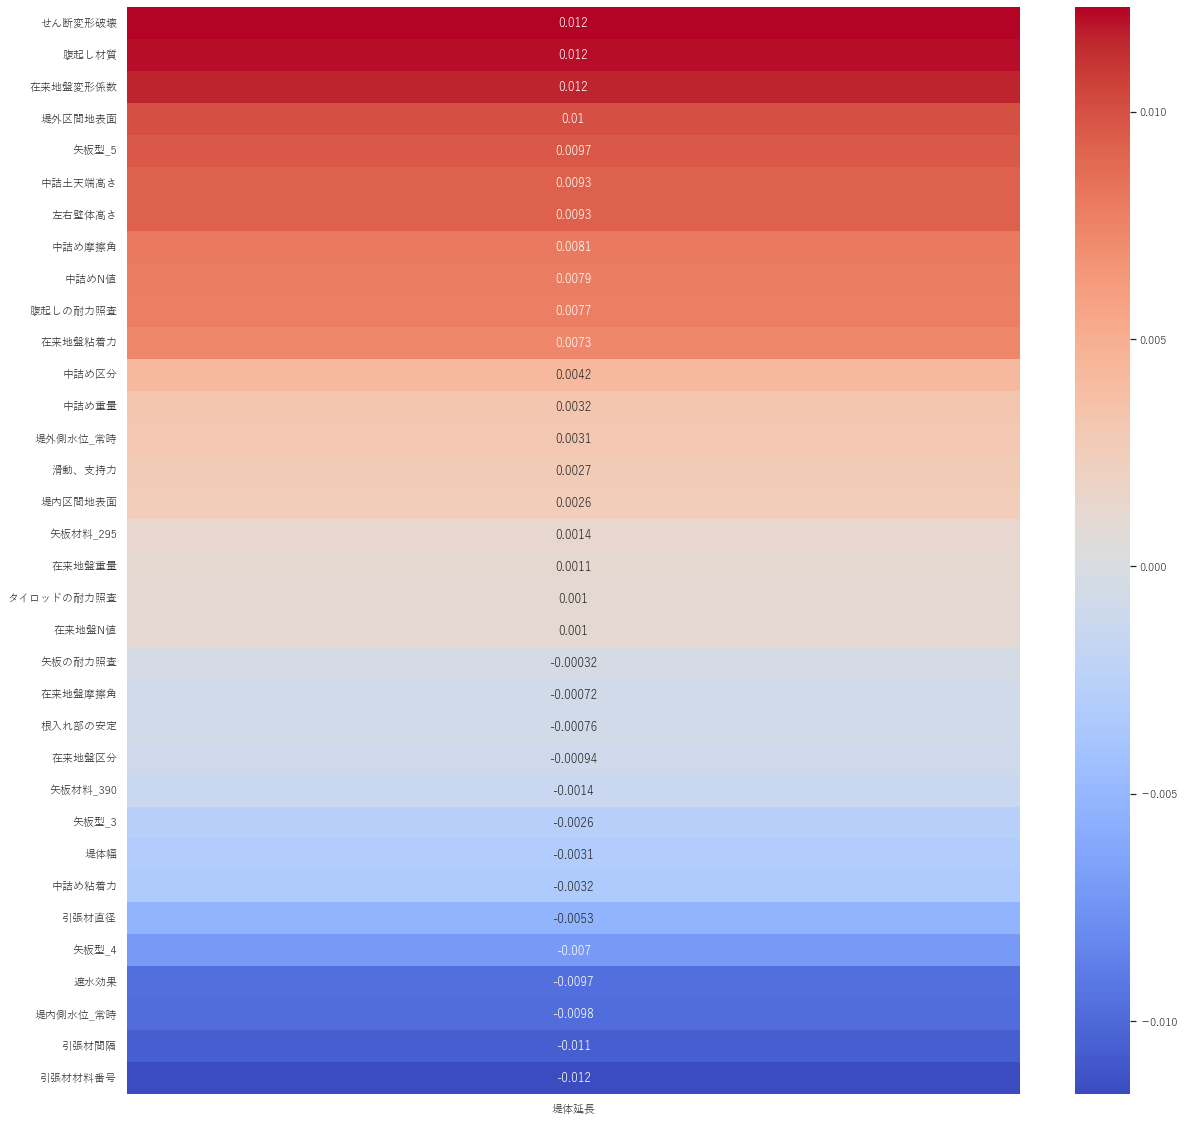

In [45]:
sns.set(font='Yu Gothic',rc = {'figure.figsize':(20,20)})
sns.heatmap(df.corr()[[pur]].sort_values(by=pur, ascending=False)[1:],cmap='coolwarm', annot=True)

## モデルの作成

### データの分割

In [46]:
# データの分割
# 全体の30%をテストデータに設定

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state = 3, stratify = df.loc[:,pur])

### 交差検証

In [47]:
# Stratified K Foldでデータを分割
from imblearn.under_sampling import RandomUnderSampler
# 目的変数と説明変数に分ける
X = train.drop([pur], axis = 1) # 予測対象以外を説明変数に設定
y = train.loc[:,pur]

# positive_count_train = y.value_counts()[1]
# strategy = {0.0:positive_count_train*3, 1.0:positive_count_train}
# rus=RandomUnderSampler(random_state=3, sampling_strategy = strategy)
# X, y = rus.fit_resample(X, y)
# train = pd.concat([y,X],axis=1)

# print(len(X))
# データの分割
# ライブラリのインポート
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3) # データを5分割する
kf = fold.split(X, y)
kf_cv = list(kf)

In [48]:
for i, (idx_train, idx_val) in enumerate(kf_cv):
    print(f'fold {i}')
    print(idx_train)
    print(idx_val)
    print('=='*30)
    print(len(idx_train), len(idx_val)) #5分割しているのでデータ数が1:4になるか確認する
    print('=='*30)

fold 0
[   0    1    2 ... 6246 6247 6248]
[  13   15   16 ... 6239 6241 6243]
4999 1250
fold 1
[   0    2    4 ... 6243 6244 6246]
[   1    3    9 ... 6245 6247 6248]
4999 1250
fold 2
[   1    2    3 ... 6245 6247 6248]
[   0    5   28 ... 6236 6242 6246]
4999 1250
fold 3
[   0    1    2 ... 6246 6247 6248]
[  14   21   22 ... 6215 6221 6228]
4999 1250
fold 4
[   0    1    3 ... 6246 6247 6248]
[   2    4    6 ... 6235 6237 6244]
5000 1249


## xgboost

In [49]:
# from xgboost.callback import early_stop
import xgboost as xgb
from sklearn import metrics # 正解率を出すためのライブラリ
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score

### ハイパーパラメータチューニング

In [61]:
import optuna
def objective(trial,df_X,df_y):
    
    params ={
    'max_depth':trial.suggest_int("max_depth",1,10),
    'min_child_weight':trial.suggest_int('min_child_weight',1,15),
    'gamma':trial.suggest_uniform('gamma',0,5),
    'subsample':trial.suggest_uniform('subsample',0,1),
    'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.5,1),
    'learning_rate':trial.suggest_uniform('learning_rate',0,1),
    'reg_alpha':trial.suggest_uniform('subsample',0,1),
    'reg_lambda':trial.suggest_uniform('subsample',0,1)
    }

    model = xgb.XGBRegressor(n_estimators=100,
                            verbosity=0,
                            n_jobs=-1,
                            random_state=42,
                            **params)

    #交差検証
    scores = cross_val_score(model, df_X, df_y, scoring='neg_mean_squared_error',cv=5)
    score_mean = np.mean(scores)

    return score_mean

In [62]:
#optuna.create_study()でoptuna.studyインスタンスを作る。
study = optuna.create_study()

#studyインスタンスのoptimize()に作った関数を渡して最適化する。
study.optimize(lambda trial: objective(trial,X,y),n_trials=200, timeout=300)

[I 2022-08-15 17:26:25,589] A new study created in memory with name: no-name-a00adc63-b51b-4dc1-be55-546fa7c4a0d8
[I 2022-08-15 17:26:26,057] Trial 0 finished with value: -38.81233339738408 and parameters: {'max_depth': 2, 'min_child_weight': 7, 'gamma': 3.1996811194805437, 'subsample': 0.3534125339175713, 'colsample_bytree': 0.5030016736093981, 'learning_rate': 0.2730090721252423}. Best is trial 0 with value: -38.81233339738408.
[I 2022-08-15 17:26:27,480] Trial 1 finished with value: -42.2553651955043 and parameters: {'max_depth': 9, 'min_child_weight': 2, 'gamma': 2.8419588305031933, 'subsample': 0.4982808795359228, 'colsample_bytree': 0.5174838768146139, 'learning_rate': 0.1608951398698829}. Best is trial 1 with value: -42.2553651955043.
[I 2022-08-15 17:26:28,268] Trial 2 finished with value: -40.30010164233044 and parameters: {'max_depth': 5, 'min_child_weight': 15, 'gamma': 1.122513964879544, 'subsample': 0.596084094155641, 'colsample_bytree': 0.5698139519557872, 'learning_rate'

In [ ]:
#スコアを見る
print(study.best_params)    

In [ ]:
print(study.best_value)

In [ ]:
xgb_params = {
    'objective': 'reg:squarederror',  # 2値分類問題
    'eval_metric': 'rmse',       # 学習用の指標
}

In [ ]:
xgb_params['max_depth'] = study.best_params['max_depth']
xgb_params['min_child_weight'] = study.best_params['min_child_weight']
xgb_params['gamma'] = study.best_params['gamma']
xgb_params['subsample'] = study.best_params['subsample']
xgb_params['colsample_bytree'] = study.best_params['colsample_bytree']
xgb_params['learning_rate'] = study.best_params['learning_rate']
xgb_params['reg_alpha'] = study.best_params['reg_alpha']
xgb_params['reg_lambda'] = study.best_params['reg_lambda']

### 学習開始

In [ ]:
import optuna
from sklearn.metrics import average_precision_score
import shap

def fit_xgb(X, y, cv, params: dict=None):
    
    models = []
    acc = []
    oof = np.zeros(len(X))
    # oof_classfication = np.zeros(len(X))

    if params is None:
        params = {}

    threshold_all = []
    for i, (idx_train, idx_val) in enumerate(kf_cv):
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train] # 学習用の説明変数と目的変数の呼び出し
        X_val, y_val = X.iloc[idx_val], y.iloc[idx_val]

        reg = xgb.XGBRegressor(**params)
        model = clf.fit(X_train, y_train,
                        eval_set=[(X_val, y_val)],  
                        early_stopping_rounds=20,
                        verbose = 2)

        acc.append(metrics.accuracy_score(y_val, pred))

        pred = model.predict(X_val) # どのクラスに分類されるのかの確率を算出
        # oof[idx_val] = pred
        models.append(model)
        print(pred_prob)

        explainer = shap.TreeExplainer(model = model,data=X_train,feature_perturbation="interventional")
        shap_values = explainer(X_train)
        shap.plots.bar(shap_values=shap_values,max_display=40)
        shap.plots.beeswarm(shap_values,max_display=40)
    
        print('MAE_train: ',mean_absolute_error(y_train, pred))
        print('Accuracy: ',accuracy_score(y_train, pred))

    print(f'平均正解率：{np.mean(acc)}')
    # return oof, models
    return models

In [ ]:
models = fit_xgb(X, y, kf_cv, xgb_params)

### テストデータ

In [ ]:
def inference_xgb(models):
    # testデータに対して推論を行う
    X_test = test.drop([pur], axis=1)
    y_test = test[pur]

    pred_test = np.zeros((len(y_test),len(y.unique()))) # 320×6の2次元配列を作成    

    for model in models:
        pred_test += model.predict(X_test)/5

    # AUC曲線
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:,1] )
    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()
    print(roc_auc_score(y_test, pred_test_prob[:,1] ))

    print('MAE_train: ',mean_absolute_error(y_test, pred_test))
    print('Accuracy: ',accuracy_score(y_test, pred_test))

    return pred_test,X_test,y_test

In [ ]:
pred_test,X_test,y_test = inference_xgb(models)

## 予測結果の可視化

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_test, pred_test, alpha = 0.5)
plt.plot(np.linspace(0, 60, 100), np.linspace(0, 60, 100), "red")
plt.show()